In [2]:
import subprocess
import gzip
import json
import pandas as pd
import os
import pickle as pkl
import nltk
from nltk.corpus import stopwords
from collections import Counter 
import matplotlib.pyplot as plt
import re
from itertools import islice
import numpy as np
import matplotlib.patches as mpatches

In [ ]:
gb = {}
for i in range(0,1024):
    if i%100 == 0:
        print(i)
    label = str(i).zfill(5)
    jsonfilename = f'/data2/sg/racball/c4/en/c4-train.{label}-of-01024.json.gz'

    with gzip.open(jsonfilename, 'r') as fin:
        data = [json.loads(line)['text'] for line in fin]

    counts = []
    for k,sentence in enumerate(data): 
        words = re.findall("\w+", sentence)
        local_dict = dict(Counter(zip(words, islice(words, 1, None))))

        count = [local_dict[i] for i in local_dict.keys() if "Entails" in i[0] or "Entails" in i[1]]
        for i in local_dict.keys():
            if "Entails" in i[0] or "Entails" in i[1]:
                if i in gb:
                    gb[i] += sum(count)
                else:
                    gb[i] = sum(count)

# Favor vs Against

In [3]:
with open (f"../scripts/bigrams_against_1000.pkl", "rb") as f:
    a = pkl.load(f)
with open (f"../scripts/bigrams_favor_1000.pkl", "rb") as f:
    b = pkl.load(f)

len(a), len(b), len(a)/len(b)

(637599, 83020, 7.680065044567574)

In [3]:
bi = {}
uni = {}

for target in ["true","false","positive","negative","favor","against","entails","contradicts",
               "True","False","Positive","Negative","Favor","Against","Entails","Contradicts"]:
    print(target)
    global_bigrams = {}
    for start in range(0,1050,50):
        finish = start + 50
        with open(f"../data/bigrams/bigrams_{start}_{finish}--{target}.pkl","rb") as f:
            local_bigrams = pkl.load(f)
        for k in local_bigrams.keys():
            if k in global_bigrams.keys():
                global_bigrams[k] = global_bigrams[k] + local_bigrams[k]
            else:
                global_bigrams[k] = local_bigrams[k]

    bi[target] = len(global_bigrams)
    uni[target] = sum(global_bigrams.values())

true
false
positive
negative
favor
against
entails
contradicts
True
False
Positive
Negative
Favor
Against
Entails
Contradicts


In [2]:
df = pd.DataFrame()
for file in os.listdir("../data/"):
    if "chunk" in file:
        df_temp = pd.read_parquet(f"../data/{file}")
        df = pd.concat([df,df_temp],ignore_index=True)
# df.to_parquet("../data/verbatim_preprocessed_tweets_taskA.parquet")

In [3]:
df

,id,true,false,positive,negative,favor,against,entails,contradicts,True,False,Positive,Negative,Favor,Against,Entails,Contradicts
0,250,14989,2972,12712,6643,12712,6643,450,130,1605,310,570,282,36,972,0,0
1,251,14968,2848,12678,6775,12678,6775,423,132,1590,336,546,291,52,947,0,0
2,252,15212,2847,12982,7162,12982,7162,426,144,1558,289,625,311,62,974,2,0
3,253,15036,2743,12709,6880,12709,6880,408,136,1381,259,585,260,44,938,0,1
4,254,15344,2888,12758,6878,12758,6878,439,117,1593,324,1018,259,65,929,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,945,14880,2868,12805,6654,12805,6654,505,119,1595,290,570,276,46,946,0,0
1020,946,15202,2816,13130,6684,13130,6684,431,120,1453,285,620,261,46,894,2,1
1021,947,15204,3004,12953,7013,12953,7013,442,108,1774,319,496,309,49,1002,1,1
1022,948,15111,2868,12744,6904,12744,6904,444,114,1509,356,490,294,32,889,3,1


In [4]:
d = dict(df.drop('id',axis=1).sum())

In [30]:
d['true']

15490254

In [29]:
sum(global_bigrams.values()) 

146902889

No handles with labels found to put in legend.


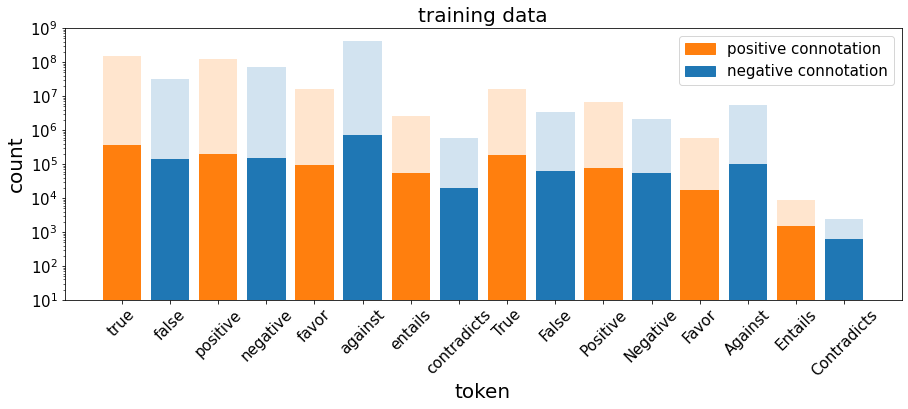

In [11]:
x = ['true','false','positive','negative','favor','against','entails','contradicts',
     'True','False','Positive','Negative','Favor','Against','Entails','Contradicts'
    ]
plt.bar(x,[uni[i] for i in x],color = ['#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4'],alpha=0.2)
plt.bar(x,[bi[i] for i in x],color = ['#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4','#ff7f0e','#1f77b4'])

plt.yscale('log')
plt.ylim(10,10**9)
plt.ylabel('count',fontsize=20)
plt.xlabel('token',fontsize=20)
_ = plt.xticks(rotation = 45,fontsize=15)
_ = plt.yticks(fontsize=15)
# plt.title("unique_bigram_counts",fontsize=15)
plt.rcParams['figure.figsize'] = (15,5)
plt.legend(prop={'size':15})
plt.title("training data",size = 20)

P = mpatches.Patch(color='#ff7f0e', label='positive connotation')
N = mpatches.Patch(color='#1f77b4', label='negative connotation')
plt.legend(handles=[P,N], loc='upper right',prop={'size':15})

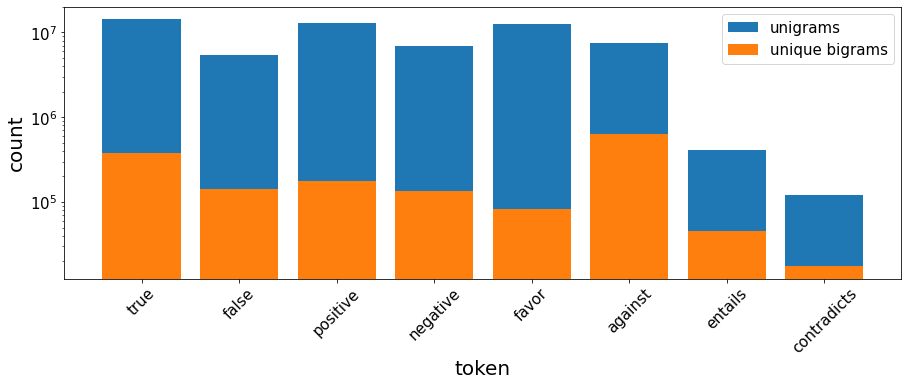

In [52]:

# plt.yscale('log')
# plt.ylabel('count',fontsize=20)
# plt.xlabel('token',fontsize=20)
# _ = plt.xticks(rotation = 45,fontsize=15)
# _ = plt.yticks(fontsize=15)
# plt.title("unique_bigram_counts",fontsize=15)
# plt.rcParams['figure.figsize'] = (15,5)

d = dict(df.drop('id',axis=1).sum())

plt.bar(['true','false','positive','negative','favor','against','entails','contradicts'],
[d['true'] + d['True'],
d['false'] + d['false'],
d['positive'] + d['Positive'],
d['negative'] + d['Negative'],
d['favor'] + d['Favor'],
d['against'] + d['Against'],
d['entails'] + d['Entails'],
d['contradicts'] + d['Contradicts']],label='unigrams')
plt.bar(hist.keys(),hist.values(),label='unique bigrams')

plt.yscale('log')
plt.ylabel('count',fontsize=20)
plt.xlabel('token',fontsize=20)
_ = plt.xticks(rotation = 45,fontsize=15)
_ = plt.yticks(fontsize=15)
# plt.title("unique_bigram_counts",fontsize=15)
plt.rcParams['figure.figsize'] = (15,5)
plt.legend(prop={'size':15})


# debugging

In [2]:
df_out = pd.DataFrame()
ids = []
true,false = [],[]
favor,against = [],[]
positive,negative = [],[]
entails,contradicts = [], []

Trues,Falses = [],[]
Favor,Against = [],[]
Positive,Negative = [],[]
Entails,Contradicts = [], []

start = 0
finish = 1
print("chunk", start,finish)
for i in range(start,finish):
    try:
        ids.append(i)
        label = str(i).zfill(5)
        print(label)
        jsonfilename = f'/data2/sg/racball/c4/en/c4-train.{label}-of-01024.json.gz'
        with gzip.open(jsonfilename, 'r') as fin:
            data = [json.loads(line)['text'] for line in fin]

        data_ = [i.split() for i in data]
        data_ = [item for sublist in data_ for item in sublist]

        d = Counter(data_)

        true.append(d["true"])
        false.append(d["false"])
        positive.append(d["positive"])
        negative.append(d["negative"])
        favor.append(d["positive"])
        against.append(d["negative"])
        entails.append(d["entails"])
        contradicts.append(d["contradicts"])

        
        Trues.append(d["True"])
        Falses.append(d["False"])
        Favor.append(d["Favor"])
        Against.append(d["Against"])
        Positive.append(d["Positive"])
        Negative.append(d["Negative"])
        Entails.append(d["Entails"])
        Contradicts.append(d["Contradicts"])

    except FileNotFoundError:
        continue

df_out['id'] = ids

df_out['true'] = true
df_out['false'] = false
df_out['positive'] = positive
df_out['negative'] = negative
df_out['favor'] = favor
df_out['against'] = against
df_out['entails'] = entails
df_out['contradicts'] = contradicts


df_out['True'] = Trues
df_out['False'] = Falses
df_out['Positive'] = Positive
df_out['Negative'] = Negative
df_out['Favor'] = Favor
df_out['Against'] = Against
df_out['Entails'] = Entails
df_out['Contradicts'] = Contradicts

chunk 0 1
00000


In [3]:
d['True']

1545

In [4]:
df_out

,id,true,false,positive,negative,favor,against,entails,contradicts,True,False,Positive,Negative,Favor,Against,Entails,Contradicts
0,0,14967,3133,13531,7252,13531,7252,455,108,1545,294,698,297,38,956,2,0


In [5]:
gb = {}
for i in range(0,1):
    if i%100 == 0:
        print(i)
    label = str(i).zfill(5)
    jsonfilename = f'/data2/sg/racball/c4/en/c4-train.{label}-of-01024.json.gz'

    with gzip.open(jsonfilename, 'r') as fin:
        data = [json.loads(line)['text'] for line in fin]

    counts = []
    for k,sentence in enumerate(data): 
        words = re.findall("\w+", sentence)
        local_dict = dict(Counter(zip(words, islice(words, 1, None))))

        count = [local_dict[i] for i in local_dict.keys() if "Entails" in i[0] or "Entails" in i[1]]
        for i in local_dict.keys():
            if "Entails" in i[0] or "Entails" in i[1]:
                if i in gb:
                    gb[i] += sum(count)
                else:
                    gb[i] = sum(count)

0


In [34]:
for k,y in enumerate(s):
    a = re.findall("\w+", y)
    break

In [35]:
a

['true', 'false']

In [32]:
s = [["true/false"]]

In [22]:
re.findall("\w+", s)

TypeError: expected string or bytes-like object

In [21]:
x = [i.split() for i in s]
Counter([item for sublist in x for item in sublist])

Counter({'true/false': 1})

In [6]:
gb

{('entailment', 'Entails'): 2,
 ('Entails', 'in'): 2,
 ('of', 'Entails'): 2,
 ('Entails', 'http'): 2}

In [14]:
s = "true/false"